In [7]:
import re
import os

info_line = re.compile(r'\[.+\]\n', re.IGNORECASE)

start_times, end_times, wav_file_names, emotions, vals, acts, doms = [], [], [], [], [], [], []

for sess in range(1, 6):
    emo_evaluation_dir = 'IEMOCAP_full_release/Session{}/dialog/EmoEvaluation/'.format(sess)
    evaluation_files = [l for l in os.listdir(emo_evaluation_dir) if 'Ses' in l]
    for file in evaluation_files:
        with open(emo_evaluation_dir + file) as f:
            content = f.read()
        info_lines = re.findall(info_line, content)
        for line in info_lines[1:]:  # the first line is a header
            start_end_time, wav_file_name, emotion, val_act_dom = line.strip().split('\t')
            start_time, end_time = start_end_time[1:-1].split('-')
            val, act, dom = val_act_dom[1:-1].split(',')
            val, act, dom = float(val), float(act), float(dom)
            start_time, end_time = float(start_time), float(end_time)
            start_times.append(start_time)
            end_times.append(end_time)
            wav_file_names.append(wav_file_name)
            emotions.append(emotion)
            vals.append(val)
            acts.append(act)
            doms.append(dom)

In [8]:
import pandas as pd

df_iemocap = pd.DataFrame(columns=['start_time', 'end_time', 'wav_file', 'emotion', 'val', 'act', 'dom'])

df_iemocap['start_time'] = start_times
df_iemocap['end_time'] = end_times
df_iemocap['wav_file'] = wav_file_names
df_iemocap['emotion'] = emotions
df_iemocap['val'] = vals
df_iemocap['act'] = acts
df_iemocap['dom'] = doms

df_iemocap.tail()

,start_time,end_time,wav_file,emotion,val,act,dom
10034,236.57,244.83,Ses05M_script03_2_M041,ang,1.0,4.5,5.0
10035,244.84,246.58,Ses05M_script03_2_M042,ang,1.0,4.5,4.5
10036,246.59,248.83,Ses05M_script03_2_M043,ang,1.5,4.0,4.5
10037,255.86,260.33,Ses05M_script03_2_M044,ang,1.0,5.0,5.0
10038,260.34,266.35,Ses05M_script03_2_M045,ang,1.0,5.0,5.0


In [10]:
df_iemocap.to_csv('pre-processed/df_iemocap.csv', index=False)

In [20]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [24]:
file_path = 'IEMOCAP_full_release/Session1/dialog/wav/Ses01F_impro01.wav'

y, sr = librosa.load(file_path, sr=44100)
y, sr

(array([ 0.42572615,  0.48587543,  0.37312022, ..., -0.31514615,
        -0.16263676,  0.        ], dtype=float32),
 44100)

In [25]:
y

array([ 0.42572615,  0.48587543,  0.37312022, ..., -0.31514615,
       -0.16263676,  0.        ], dtype=float32)

In [29]:
# Run this code to listen to audio samples, just to get quick feeling
# import pydub
# import simpleaudio

# sound = pydub.AudioSegment.from_wav(file_path)
# playback = simpleaudio.play_buffer(
#     sound.raw_data, 
#     num_channels=sound.channels, 
#     bytes_per_sample=sound.sample_width, 
#     sample_rate=sound.frame_rate
#     )

In [30]:
import pandas as pd
import math

labels_df = pd.read_csv('pre-processed/df_iemocap.csv')
iemocap_dir = 'IEMOCAP_full_release/'

sr = 44100
audio_vectors = {}
for sess in range(1, 6):  # using one session due to memory constraint, can replace [5] with range(1, 6)
    wav_file_path = '{}Session{}/dialog/wav/'.format(iemocap_dir, sess)
    orig_wav_files = os.listdir(wav_file_path)
    for orig_wav_file in tqdm(orig_wav_files):
        try:
            orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
            orig_wav_file, file_format = orig_wav_file.split('.')
            for index, row in labels_df[labels_df['wav_file'].str.contains(orig_wav_file)].iterrows():
                start_time, end_time, truncated_wav_file_name, emotion, val, act, dom = row['start_time'], row['end_time'], row['wav_file'], row['emotion'], row['val'], row['act'], row['dom']
                start_frame = math.floor(start_time * sr)
                end_frame = math.floor(end_time * sr)
                truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]
                audio_vectors[truncated_wav_file_name] = truncated_wav_vector
        except:
            print('An exception occured for {}'.format(orig_wav_file))
    with open('pre-processed/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
        pickle.dump(audio_vectors, f)

  0%|                                                                                             | 0/56 [00:00<?, ?it/s]C:\Users\SHUBHAM\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 23%|███████████████████▎                                                               | 13/56 [00:00<00:00, 123.08it/s]

An exception occured for ._Ses01F_impro01.wav
An exception occured for ._Ses01F_impro02.wav
An exception occured for ._Ses01F_impro03.wav
An exception occured for ._Ses01F_impro04.wav
An exception occured for ._Ses01F_impro05.wav
An exception occured for ._Ses01F_impro06.wav
An exception occured for ._Ses01F_impro07.wav
An exception occured for ._Ses01F_script01_1.wav
An exception occured for ._Ses01F_script01_2.wav
An exception occured for ._Ses01F_script01_3.wav
An exception occured for ._Ses01F_script02_1.wav
An exception occured for ._Ses01F_script02_2.wav
An exception occured for ._Ses01F_script03_1.wav
An exception occured for ._Ses01F_script03_2.wav
An exception occured for ._Ses01M_impro01.wav
An exception occured for ._Ses01M_impro02.wav
An exception occured for ._Ses01M_impro03.wav
An exception occured for ._Ses01M_impro04.wav
An exception occured for ._Ses01M_impro05.wav
An exception occured for ._Ses01M_impro06.wav
An exception occured for ._Ses01M_impro07.wav
An exception 

 46%|██████████████████████████████████████▌                                            | 26/56 [00:00<00:00, 125.59it/s]

An exception occured for ._Ses01M_script02_2.wav
An exception occured for ._Ses01M_script03_1.wav
An exception occured for ._Ses01M_script03_2.wav


 18%|██████████████▋                                                                    | 11/62 [00:00<00:00, 102.12it/s]

An exception occured for ._Ses02F_impro01.wav
An exception occured for ._Ses02F_impro02.wav
An exception occured for ._Ses02F_impro03.wav
An exception occured for ._Ses02F_impro04.wav
An exception occured for ._Ses02F_impro05.wav
An exception occured for ._Ses02F_impro06.wav
An exception occured for ._Ses02F_impro07.wav
An exception occured for ._Ses02F_impro08.wav
An exception occured for ._Ses02F_script01_1.pk
An exception occured for ._Ses02F_script01_1.wav
An exception occured for ._Ses02F_script01_2.wav
An exception occured for ._Ses02F_script01_3.wav
An exception occured for ._Ses02F_script02_1.wav
An exception occured for ._Ses02F_script02_2.wav
An exception occured for ._Ses02F_script03_1.wav
An exception occured for ._Ses02F_script03_2.wav
An exception occured for ._Ses02M_impro01.wav
An exception occured for ._Ses02M_impro02.wav
An exception occured for ._Ses02M_impro03.wav
An exception occured for ._Ses02M_impro04.wav
An exception occured for ._Ses02M_impro05.wav
An exceptio

 37%|██████████████████████████████▊                                                    | 23/62 [00:00<00:00, 109.37it/s]


An exception occured for ._Ses02M_impro07.wav
An exception occured for ._Ses02M_impro08.wav
An exception occured for ._Ses02M_script01_1.wav
An exception occured for ._Ses02M_script01_2.wav
An exception occured for ._Ses02M_script01_3.wav
An exception occured for ._Ses02M_script02_1.wav
An exception occured for ._Ses02M_script02_2.wav
An exception occured for ._Ses02M_script03_1.wav
An exception occured for ._Ses02M_script03_2.wav


 60%|██████████████████████████████████████████████████▏                                 | 37/62 [00:47<01:04,  2.58s/it]

An exception occured for Ses02F_script01_1.pk


 17%|██████████████▎                                                                    | 11/64 [00:00<00:00, 103.08it/s]

An exception occured for ._Ses03F_impro01.wav
An exception occured for ._Ses03F_impro02.wav
An exception occured for ._Ses03F_impro03.wav
An exception occured for ._Ses03F_impro04.wav
An exception occured for ._Ses03F_impro05.wav
An exception occured for ._Ses03F_impro06.wav
An exception occured for ._Ses03F_impro07.wav
An exception occured for ._Ses03F_impro08.wav
An exception occured for ._Ses03F_script01_1.wav
An exception occured for ._Ses03F_script01_2.wav
An exception occured for ._Ses03F_script01_3.wav
An exception occured for ._Ses03F_script02_1.wav
An exception occured for ._Ses03F_script02_2.wav
An exception occured for ._Ses03F_script03_1.wav
An exception occured for ._Ses03F_script03_2.wav
An exception occured for ._Ses03M_impro01.wav
An exception occured for ._Ses03M_impro02.wav
An exception occured for ._Ses03M_impro03.wav
An exception occured for ._Ses03M_impro04.wav
An exception occured for ._Ses03M_impro05a.wav
An exception occured for ._Ses03M_impro05b.wav
An exceptio

 36%|█████████████████████████████▊                                                     | 23/64 [00:00<00:00, 111.66it/s]

An exception occured for ._Ses03M_impro07.wav
An exception occured for ._Ses03M_impro08a.wav
An exception occured for ._Ses03M_impro08b.wav
An exception occured for ._Ses03M_script01_1.wav
An exception occured for ._Ses03M_script01_2.wav
An exception occured for ._Ses03M_script01_3.wav
An exception occured for ._Ses03M_script02_1.wav
An exception occured for ._Ses03M_script02_2.wav
An exception occured for ._Ses03M_script03_1.wav
An exception occured for ._Ses03M_script03_2.wav


 18%|███████████████▏                                                                   | 11/60 [00:00<00:00, 107.08it/s]

An exception occured for ._Ses04F_impro01.wav
An exception occured for ._Ses04F_impro02.wav
An exception occured for ._Ses04F_impro03.wav
An exception occured for ._Ses04F_impro04.wav
An exception occured for ._Ses04F_impro05.wav
An exception occured for ._Ses04F_impro06.wav
An exception occured for ._Ses04F_impro07.wav
An exception occured for ._Ses04F_impro08.wav
An exception occured for ._Ses04F_script01_1.wav
An exception occured for ._Ses04F_script01_2.wav
An exception occured for ._Ses04F_script01_3.wav
An exception occured for ._Ses04F_script02_1.wav
An exception occured for ._Ses04F_script02_2.wav
An exception occured for ._Ses04F_script03_1.wav
An exception occured for ._Ses04F_script03_2.wav
An exception occured for ._Ses04M_impro01.wav
An exception occured for ._Ses04M_impro02.wav
An exception occured for ._Ses04M_impro03.wav
An exception occured for ._Ses04M_impro04.wav
An exception occured for ._Ses04M_impro05.wav
An exception occured for ._Ses04M_impro06.wav
An exception 

 38%|███████████████████████████████▊                                                   | 23/60 [00:00<00:00, 109.68it/s]


An exception occured for ._Ses04M_impro08.wav
An exception occured for ._Ses04M_script01_1.wav
An exception occured for ._Ses04M_script01_2.wav
An exception occured for ._Ses04M_script01_3.wav
An exception occured for ._Ses04M_script02_1.wav
An exception occured for ._Ses04M_script02_2.wav
An exception occured for ._Ses04M_script03_1.wav
An exception occured for ._Ses04M_script03_2.wav


 18%|██████████████▋                                                                    | 11/62 [00:00<00:00, 104.05it/s]

An exception occured for ._Ses05F_impro01.wav
An exception occured for ._Ses05F_impro02.wav
An exception occured for ._Ses05F_impro03.wav
An exception occured for ._Ses05F_impro04.wav
An exception occured for ._Ses05F_impro05.wav
An exception occured for ._Ses05F_impro06.wav
An exception occured for ._Ses05F_impro07.wav
An exception occured for ._Ses05F_impro08.wav
An exception occured for ._Ses05F_script01_1.wav
An exception occured for ._Ses05F_script01_2.wav
An exception occured for ._Ses05F_script01_3.wav
An exception occured for ._Ses05F_script02_1.wav
An exception occured for ._Ses05F_script02_2.wav
An exception occured for ._Ses05F_script03_1.wav
An exception occured for ._Ses05F_script03_2.wav
An exception occured for ._Ses05M_impro01.wav
An exception occured for ._Ses05M_impro02.wav
An exception occured for ._Ses05M_impro03.wav
An exception occured for ._Ses05M_impro04.wav
An exception occured for ._Ses05M_impro05.wav
An exception occured for ._Ses05M_impro06.wav
An exception 

 37%|██████████████████████████████▊                                                    | 23/62 [00:00<00:00, 109.01it/s]


An exception occured for ._Ses05M_impro08.wav
An exception occured for ._Ses05M_script01_1.wav
An exception occured for ._Ses05M_script01_1b.wav
An exception occured for ._Ses05M_script01_2.wav
An exception occured for ._Ses05M_script01_3.wav
An exception occured for ._Ses05M_script02_1.wav
An exception occured for ._Ses05M_script02_2.wav
An exception occured for ._Ses05M_script03_1.wav
An exception occured for ._Ses05M_script03_2.wav


100%|████████████████████████████████████████████████████████████████████████████████████| 62/62 [04:52<00:00,  4.71s/it]


In [4]:
import math
import random
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle
import pandas as pd

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [5]:
data_dir = 'pre-processed/'
labels_df_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_1.pkl'.format(data_dir)

In [18]:
labels_df = pd.read_csv(labels_df_path)
audio_vectors = pickle.load(open(audio_vectors_path, 'rb'))

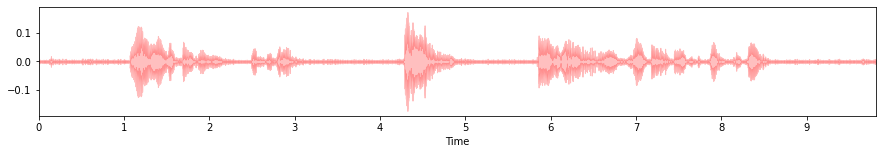

In [19]:
# Pick a Random File
random_file_name = list(audio_vectors.keys())[random.choice(range(len(audio_vectors.keys())))]
y = audio_vectors[random_file_name]
sr = 44100

plt.figure(figsize=(15,2))
librosa.display.waveplot(y, sr=sr, max_sr=1000, alpha=0.25, color='r')

import IPython.display as ipd
ipd.Audio(y, rate=sr)

In [20]:
filter = labels_df['wav_file']== random_file_name
  
# filtering data
labels_df[filter]

,start_time,end_time,wav_file,emotion,val,act,dom
1567,222.6559,232.4642,Ses01M_script02_2_F022,sad,3.0,2.5,2.5


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

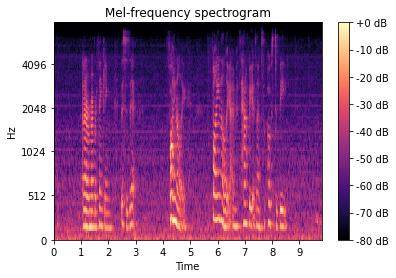

In [21]:
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

stft - Short-Time Fourier Transform
https://musicinformationretrieval.com/stft.html

In [30]:
# Calculating STFTs

hop_length = 512
n_fft = 4096
print(float(hop_length)/sr) # units of seconds
print(float(n_fft)/sr)  # units of seconds
Y_stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

0.011609977324263039
0.09287981859410431


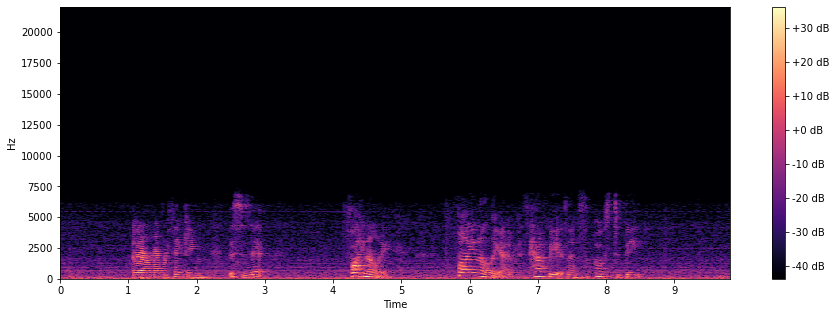

In [31]:
# Plotting Spectogram
S = librosa.amplitude_to_db(abs(Y_stft))

plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

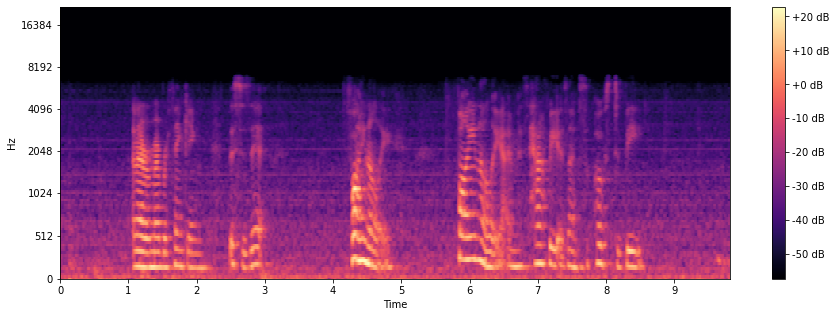

In [33]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=hop_length)
logS = librosa.power_to_db(abs(S))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logS, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [36]:
Y_stft.shape

(2049, 845)

### Normalization
A technique used to adjust the volume of audio files to a standard set level; if this isn’t done, the volume can differ greatly from word to word, and the file can end up unable to be processed clearly.

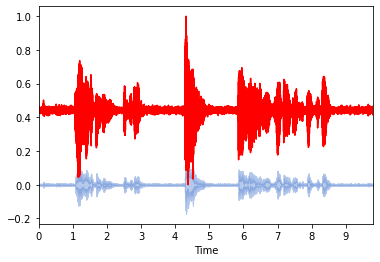

In [40]:
#min = minimum value for each row of the vector signal
#max = maximum value for each row of the vector signal
import sklearn

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform

T = len(y)/sr    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False)

librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(y), color='r')

### Pre-emphasis
Pre-emphasis is done before starting with feature extraction. We do this by boosting only the signal’s high-frequency components, while leaving the low-frequency components in their original states. This is done in order to compensate the high-frequency section, which is suppressed naturally when humans make sounds.

Text(0.5, 1.0, 'Pre-emphasized signal')

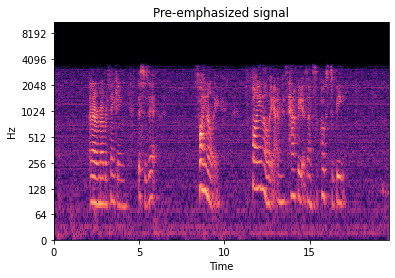

In [42]:
Y_filt = librosa.effects.preemphasis(y)

S_orig = librosa.amplitude_to_db(np.abs(Y_stft), ref=np.max)
Y_filt = librosa.stft(Y_filt, n_fft=n_fft, hop_length=hop_length)

S_preemph = librosa.amplitude_to_db(np.abs(Y_filt), ref=np.max)

librosa.display.specshow(S_orig, y_axis='log', x_axis='time')
plt.title('Original signal')
librosa.display.specshow(S_preemph, y_axis='log', x_axis='time')
plt.title('Pre-emphasized signal')

### Zero Crossing Rate
The number times over a given interval that the signal’s amplitude crosses a value of zero. Essentiually, it denotes the number of times the signal changes sign from positive to negative in the given time period. If the count of zero crossings is higher for a given signal, the signal is said to change rapidly, which implies that the signal contains the high-frequency information, and vice-versa.

(100,)

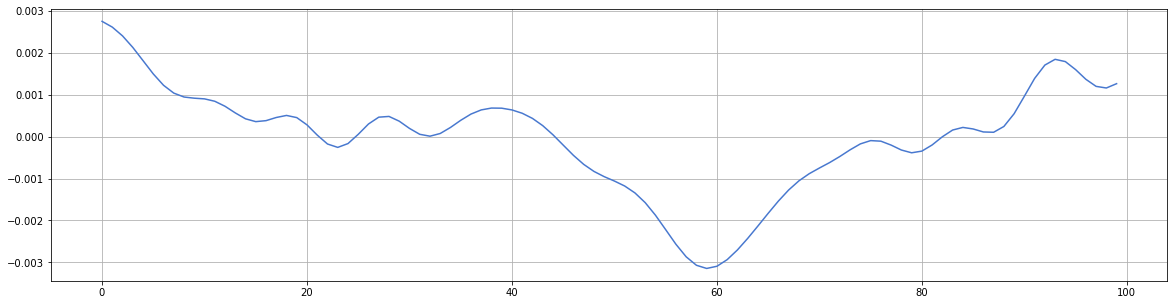

In [43]:
#zero crossings to be found between a given time
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(y[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
zero_crossings.shape

### Spectral Rolloff
The rolloff frequency is defined as the frequency under which the cutoff of the total energy of the spectrum is contained, eg. 85%. It can be used to distinguish between harmonic and noisy sounds.

ValueError: x and y must have same first dimension, but have shapes (432547,) and (845,)

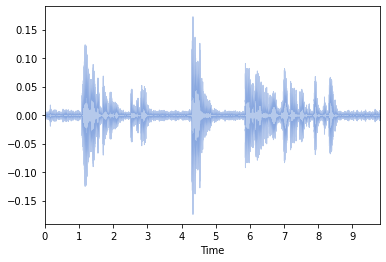

In [51]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

# Approximate minimum frequencies with roll_percent=0.1
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.1)
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, rolloff[0], color='r')

In [53]:
librosa.feature.mfcc(y, sr=sr).shape

(20, 845)

Signal mean = 0.01474
Signal std dev = 0.02671
RMSE mean = 0.01828
RMSE std dev = 0.01947


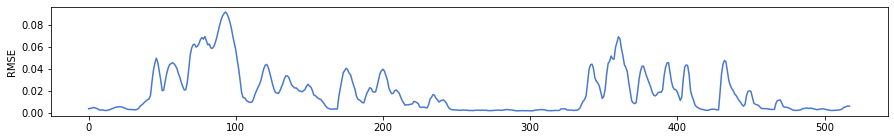

In [45]:
print('Signal mean = {:.5f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.5f}'.format(np.std(y)))

rmse = librosa.feature.rms(y + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMSE mean = {:.5f}'.format(np.mean(rmse)))
print('RMSE std dev = {:.5f}'.format(np.std(rmse)))

In [46]:
silence = 0
for e in rmse:
    if e <= 0.4 * np.mean(rmse):
        silence += 1
print(silence/float(len(rmse)))

0.4343629343629344


In [47]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
np.mean(y_harmonic)

-2.9310695e-06

In [48]:
autocorr = librosa.core.autocorrelate(y)
np.max(autocorr)

189.11599013825372

In [49]:
columns = ['wav_file', 'label', 'sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic', 'auto_corr_max', 'auto_corr_std']
df_features = pd.DataFrame(columns=columns)

emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

data_dir = 'pre-processed/'
labels_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_'.format(data_dir)

In [ ]:
labels_df = pd.read_csv(labels_path)

for sess in (range(1, 6)):
        audio_vectors = pickle.load(open('{}{}.pkl'.format(audio_vectors_path, sess), 'rb'))
        for index, row in tqdm(labels_df[labels_df['wav_file'].str.contains('Ses0{}'.format(sess))].iterrows()):
            try:
                wav_file_name = row['wav_file']
                label = emotion_dict[row['emotion']]
                y = audio_vectors[wav_file_name]

                feature_list = [wav_file_name, label]  # wav_file, label
                sig_mean = np.mean(abs(y))
                feature_list.append(sig_mean)  # sig_mean
                feature_list.append(np.std(y))  # sig_std

                rmse = librosa.feature.rms(y + 0.0001)[0]
                feature_list.append(np.mean(rmse))  # rmse_mean
                feature_list.append(np.std(rmse))  # rmse_std

                silence = 0
                for e in rmse:
                    if e <= 0.4 * np.mean(rmse):
                        silence += 1
                silence /= float(len(rmse))
                feature_list.append(silence)  # silence

                y_harmonic = librosa.effects.hpss(y)[0]
                feature_list.append(np.mean(y_harmonic) * 1000)  # harmonic (scaled by 1000)

                # based on the pitch detection algorithm mentioned here:
                # http://access.feld.cvut.cz/view.php?cisloclanku=2009060001
                cl = 0.45 * sig_mean
                center_clipped = []
                for s in y:
                    if s >= cl:
                        center_clipped.append(s - cl)
                    elif s <= -cl:
                        center_clipped.append(s + cl)
                    elif np.abs(s) < cl:
                        center_clipped.append(0)
                auto_corrs = librosa.core.autocorrelate(np.array(center_clipped))
                feature_list.append(1000 * np.max(auto_corrs)/len(auto_corrs))  # auto_corr_max (scaled by 1000)
                feature_list.append(np.std(auto_corrs))  # auto_corr_std

                df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
            except:
                print('Some exception occured')

df_features.to_csv('pre-processed/audio_features.csv', index=False)

770it [19:31,  2.07s/it]

Some exception occured


1558it [38:00,  1.51s/it]

Some exception occured


1565it [38:14,  2.15s/it]

Some exception occured


1566it [38:15,  1.85s/it]

Some exception occured


1577it [38:33,  1.16s/it]